<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Project_7_Prabhhav_Naive_Bayes_Classifier_Email_Spam_Classification_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")

In [63]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
# it has 2 columns and 5572 rows
df.shape

(5572, 2)

In [65]:
# Both are not same coz it is case seisitive
"OK" == "ok"

False

In [66]:
# So we convert every words to lower case
df['Message'] = df.Message.str.lower()

In [68]:
# No. of times a particular word is present in the entire dataset
df.Message.str.contains("free").sum()

265

In [69]:
df.Message.str.contains("offer").sum()

46

In [70]:
df.Message.str.contains("friend").sum()

128

In [71]:
df.Message.str.contains("work").sum()

176

### Bag of words

![](https://chrisalbon.com/images/machine_learning_flashcards/Bag_Of_Words_print.png)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]

In [74]:
vectorizer = CountVectorizer()

In [75]:
X = vectorizer.fit_transform(corpus)

In [76]:
# unique words from the corpus
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [77]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [78]:
# To easily visualize
table = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
table['corpus'] = corpus
table.head()

,and,document,first,is,one,second,the,third,this,corpus
0,0,1,1,1,0,0,1,0,1,This is the first document.
1,0,2,0,1,0,1,1,0,1,This document is the second document.
2,1,0,0,1,1,0,1,1,1,And this is the third one.
3,0,1,1,1,0,0,1,0,1,Is this the first document?


In [79]:
# convert ham and spam to 0 and 1
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [80]:
df.head()

,Category,Message,spam
0,ham,"go until jurong point, crazy.. available only ...",0
1,ham,ok lar... joking wif u oni...,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor... u c already then say...,0
4,ham,"nah i don't think he goes to usf, he lives aro...",0


In [81]:
X = list(df['Message'])
y = list(df['spam'])

In [82]:
X

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had you

Building the Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

Text Vectorization

In [84]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 500
max_len = 5
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [85]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
vectorize_layer.adapt(X)

In [86]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'to',
 'i',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'it',
 'of',
 'call',
 'have',
 'on',
 'that',
 'are',
 '2',
 'now',
 'im',
 'so',
 'not',
 'but',
 'or',
 'can',
 'at',
 'do',
 'ur',
 'get',
 'be',
 'will',
 'if',
 'with',
 'just',
 'we',
 'no',
 'this',
 'its',
 'up',
 '4',
 'dont',
 'when',
 'go',
 'ok',
 'from',
 'ltgt',
 'free',
 'all',
 'out',
 'how',
 'what',
 'know',
 'like',
 'ill',
 'got',
 'good',
 'then',
 'was',
 'come',
 'am',
 'only',
 'time',
 'day',
 'love',
 'there',
 'want',
 'send',
 'text',
 'he',
 'as',
 'by',
 'one',
 'going',
 'ü',
 'need',
 'about',
 'txt',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'r',
 'stop',
 'back',
 'our',
 'n',
 'reply',
 'today',
 'mobile',
 'tell',
 'new',
 'well',
 'later',
 'hi',
 'think',
 'she',
 'da',
 'been',
 'any',
 'please',
 'take',
 'they',
 'phone',
 'her',
 'cant',
 'did',
 'some',
 'here',
 'has',
 'week',
 'night',
 'an',
 'who',
 'oh',
 'much',
 'hey',
 'g

In [91]:
model.add(vectorize_layer)

TypeError: ignored

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Embedding

In [94]:
from tensorflow.keras.layers import Embedding

# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 64))

The Recurrent Layer

In [95]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# 64 is the "units" parameter, which is the
# dimensionality of the output space.
model.add(LSTM(32))

In [96]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, 5)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 5, 64)             32064     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 45,025
Trainable params: 45,025
Non-trainable params: 0
_________________________________________________________________


4. Compiling the Model

In [98]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

Training the model

In [99]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
117/117 [==============================] - 3s 11ms/step - loss: 0.5314 - accuracy: 0.8568 - val_loss: 0.2148 - val_accuracy: 0.9179
Epoch 2/20
117/117 [==============================] - 1s 8ms/step - loss: 0.1949 - accuracy: 0.9298 - val_loss: 0.1661 - val_accuracy: 0.9429
Epoch 3/20
117/117 [==============================] - 1s 6ms/step - loss: 0.1459 - accuracy: 0.9487 - val_loss: 0.1645 - val_accuracy: 0.9462
Epoch 4/20
117/117 [==============================] - 1s 6ms/step - loss: 0.1250 - accuracy: 0.9558 - val_loss: 0.1739 - val_accuracy: 0.9413
Epoch 5/20
117/117 [==============================] - 1s 6ms/step - loss: 0.1268 - accuracy: 0.9567 - val_loss: 0.1934 - val_accuracy: 0.9358
Epoch 6/20
117/117 [==============================] - 1s 6ms/step - loss: 0.1059 - accuracy: 0.9637 - val_loss: 0.1767 - val_accuracy: 0.9402
Epoch 7/20
117/117 [==============================] - 1s 6ms/step - loss: 0.1043 - accuracy: 0.9645 - val_loss: 0.1929 - val_accuracy: 0.9358
Epoch

In [100]:
import matplotlib.pylab as plt


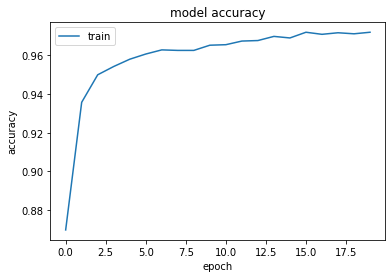

In [101]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


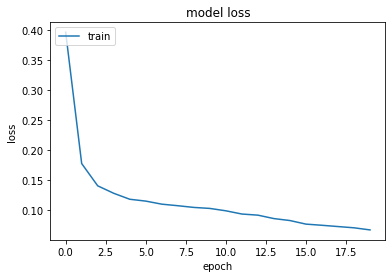

In [102]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [103]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(501, 64)


In [104]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [105]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 8))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, 5)                 0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 5, 8)              4008      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                400       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 4,697
Trainable params: 4,697
Non-trainable params: 0
_________________________________________________________________


In [107]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)


In [108]:
history = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
117/117 [==============================] - 2s 7ms/step - loss: 0.5239 - accuracy: 0.8380 - val_loss: 0.3221 - val_accuracy: 0.8662
Epoch 2/20
117/117 [==============================] - 0s 4ms/step - loss: 0.2911 - accuracy: 0.8697 - val_loss: 0.2090 - val_accuracy: 0.9277
Epoch 3/20
117/117 [==============================] - 0s 4ms/step - loss: 0.1672 - accuracy: 0.9389 - val_loss: 0.1804 - val_accuracy: 0.9337
Epoch 4/20
117/117 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9570 - val_loss: 0.1751 - val_accuracy: 0.9413
Epoch 5/20
117/117 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9693 - val_loss: 0.1756 - val_accuracy: 0.9445
Epoch 6/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9689 - val_loss: 0.1823 - val_accuracy: 0.9451
Epoch 7/20
117/117 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9734 - val_loss: 0.1977 - val_accuracy: 0.9369
Epoch 

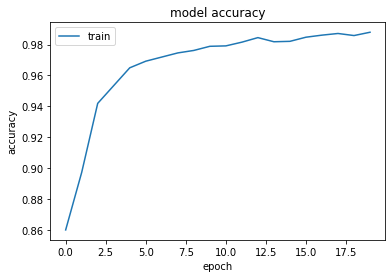

In [109]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()